# **Set Up Environment**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import os
import torch
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader

# **Load Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
transform = transforms.Compose([
    transforms.Resize((300, 300)),
    transforms.ToTensor(),
])

dataset = datasets.ImageFolder(root='/content/drive/MyDrive/Colab Notebooks/ProjectML/data/train', transform=transform)
loader = DataLoader(dataset, batch_size=32, shuffle=False)


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
resnet = models.resnet18(pretrained=True)
resnet = torch.nn.Sequential(*list(resnet.children())[:-1])
resnet.to(device)
resnet.eval()

features = []
labels = []

with torch.no_grad():
    for imgs, lbls in loader:
        imgs = imgs.to(device)
        feats = resnet(imgs).squeeze()
        features.append(feats.cpu().numpy())
        labels.extend([dataset.classes[i] for i in lbls])

X = np.vstack(features)
y = np.array(labels)

scaler = StandardScaler()
X = scaler.fit_transform(X)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 102MB/s]


# **Logistic Regression**

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy for test size=0.1: 87.600%
              precision    recall  f1-score   support

   n01443537       0.95      0.87      0.91        63
   n02410509       0.98      0.94      0.96        54
   n03977966       0.94      0.98      0.96        51
   n07715103       0.84      0.86      0.85        44
   n07747607       0.81      0.82      0.82        51
   n07768694       0.90      0.83      0.87        54
   n07873807       0.87      0.89      0.88        45
   n07920052       0.93      0.91      0.92        55
   n09256479       0.79      0.83      0.81        36
   n12267677       0.71      0.79      0.75        47

    accuracy                           0.88       500
   macro avg       0.87      0.87      0.87       500
weighted avg       0.88      0.88      0.88       500



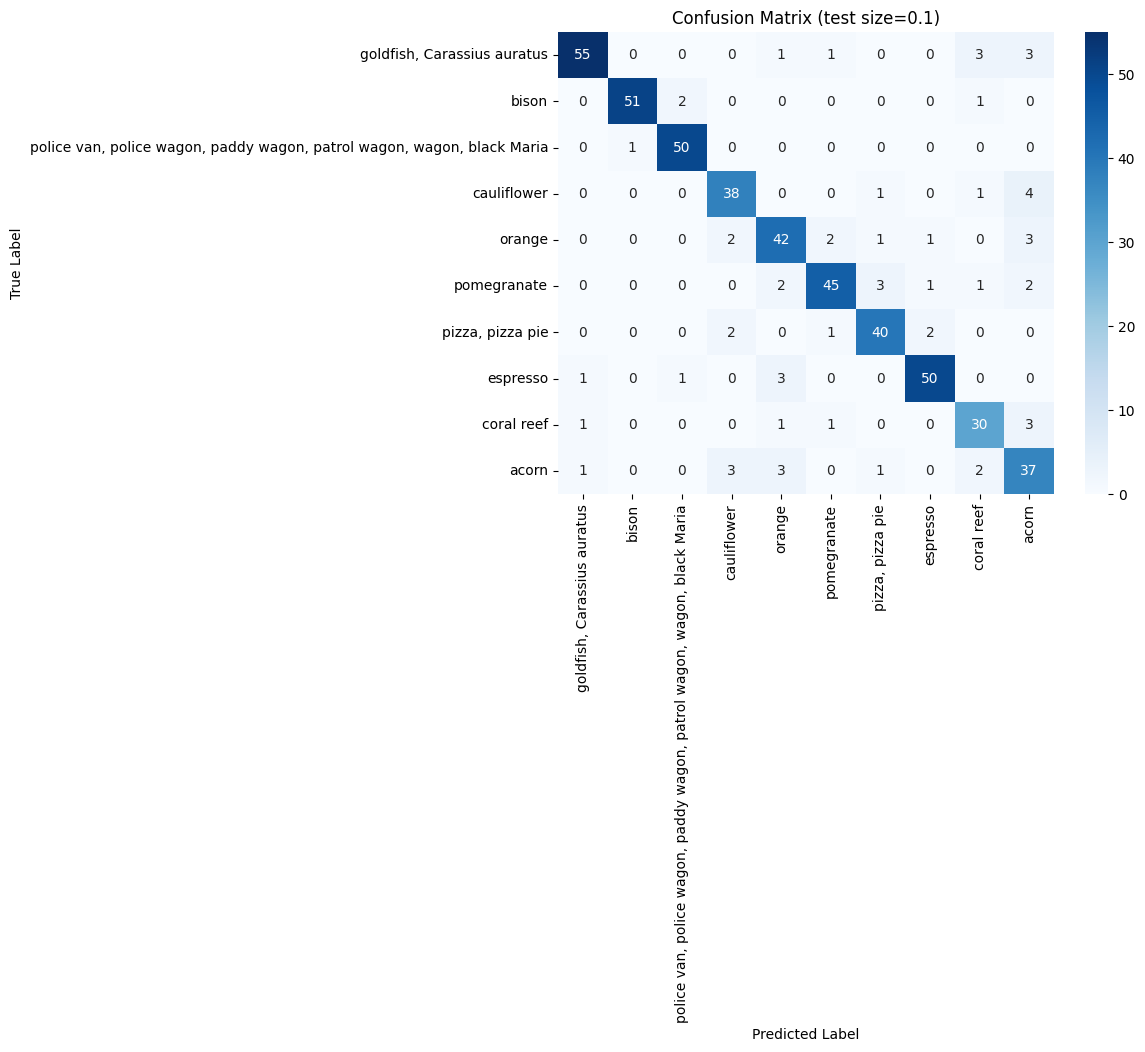


 -+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy for test size=0.2: 89.000%
              precision    recall  f1-score   support

   n01443537       0.92      0.88      0.90       111
   n02410509       0.98      0.94      0.96       105
   n03977966       0.96      0.99      0.98       105
   n07715103       0.84      0.81      0.83        85
   n07747607       0.81      0.87      0.84        94
   n07768694       0.87      0.84      0.85        98
   n07873807       0.85      0.91      0.88        98
   n07920052       0.95      0.96      0.95       112
   n09256479       0.86      0.85      0.86        81
   n12267677       0.83      0.82      0.83       111

    accuracy                           0.89      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.89      0.89      0.89      1000



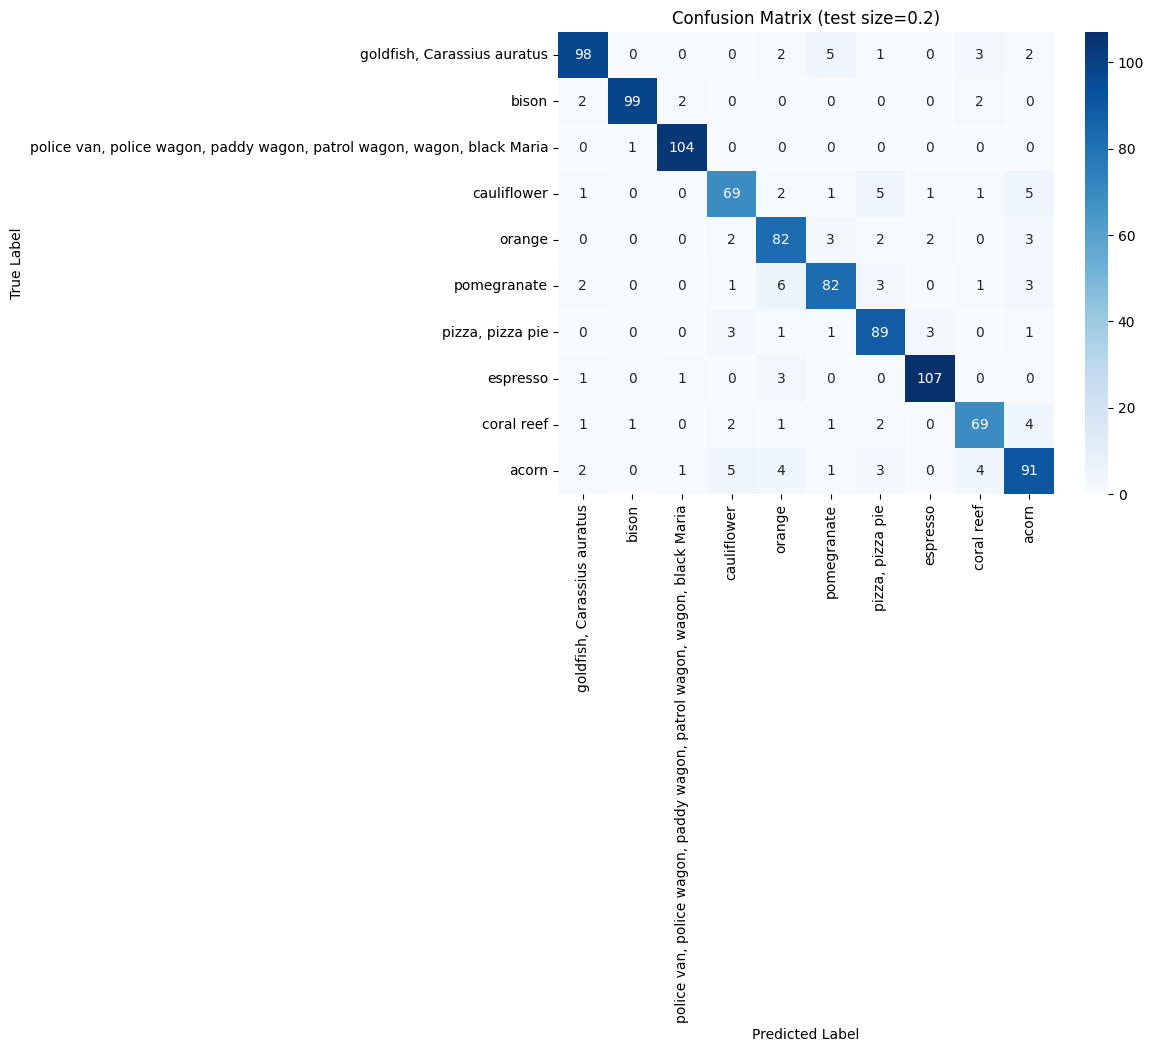


 -+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy for test size=0.3: 88.733%
              precision    recall  f1-score   support

   n01443537       0.94      0.89      0.91       164
   n02410509       0.95      0.95      0.95       152
   n03977966       0.96      0.98      0.97       155
   n07715103       0.87      0.82      0.85       154
   n07747607       0.83      0.87      0.85       143
   n07768694       0.88      0.81      0.84       141
   n07873807       0.85      0.92      0.88       143
   n07920052       0.92      0.98      0.95       158
   n09256479       0.86      0.87      0.87       132
   n12267677       0.82      0.77      0.79       158

    accuracy                           0.89      1500
   macro avg       0.89      0.89      0.89      1500
weighted avg       0.89      0.89      0.89      1500



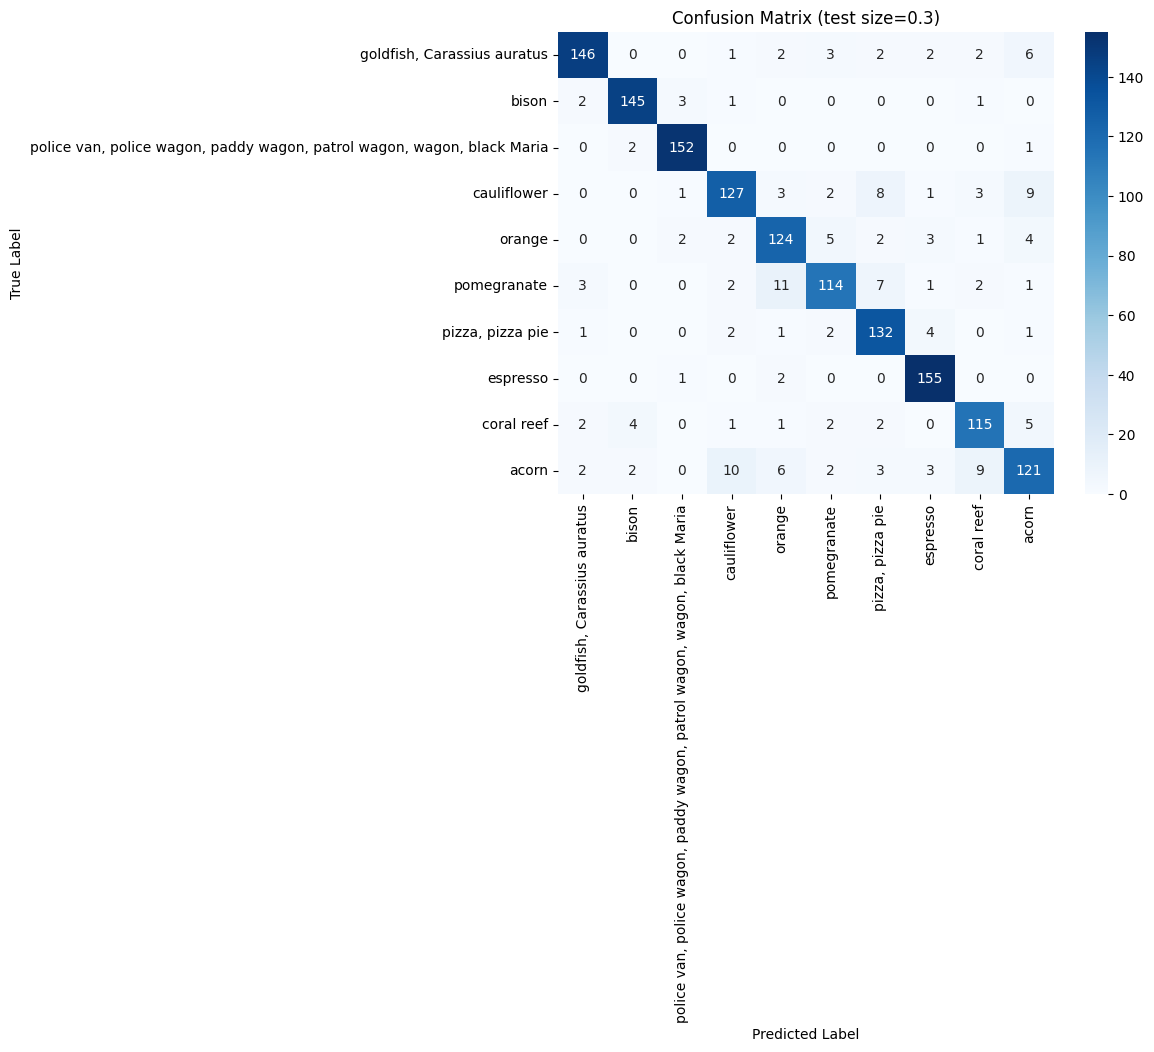


 -+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy for test size=0.4: 88.000%
              precision    recall  f1-score   support

   n01443537       0.92      0.88      0.90       220
   n02410509       0.93      0.93      0.93       189
   n03977966       0.96      0.99      0.97       210
   n07715103       0.88      0.80      0.84       208
   n07747607       0.85      0.86      0.86       212
   n07768694       0.87      0.81      0.84       190
   n07873807       0.87      0.92      0.89       190
   n07920052       0.92      0.96      0.94       198
   n09256479       0.85      0.87      0.86       190
   n12267677       0.75      0.78      0.77       193

    accuracy                           0.88      2000
   macro avg       0.88      0.88      0.88      2000
weighted avg       0.88      0.88      0.88      2000



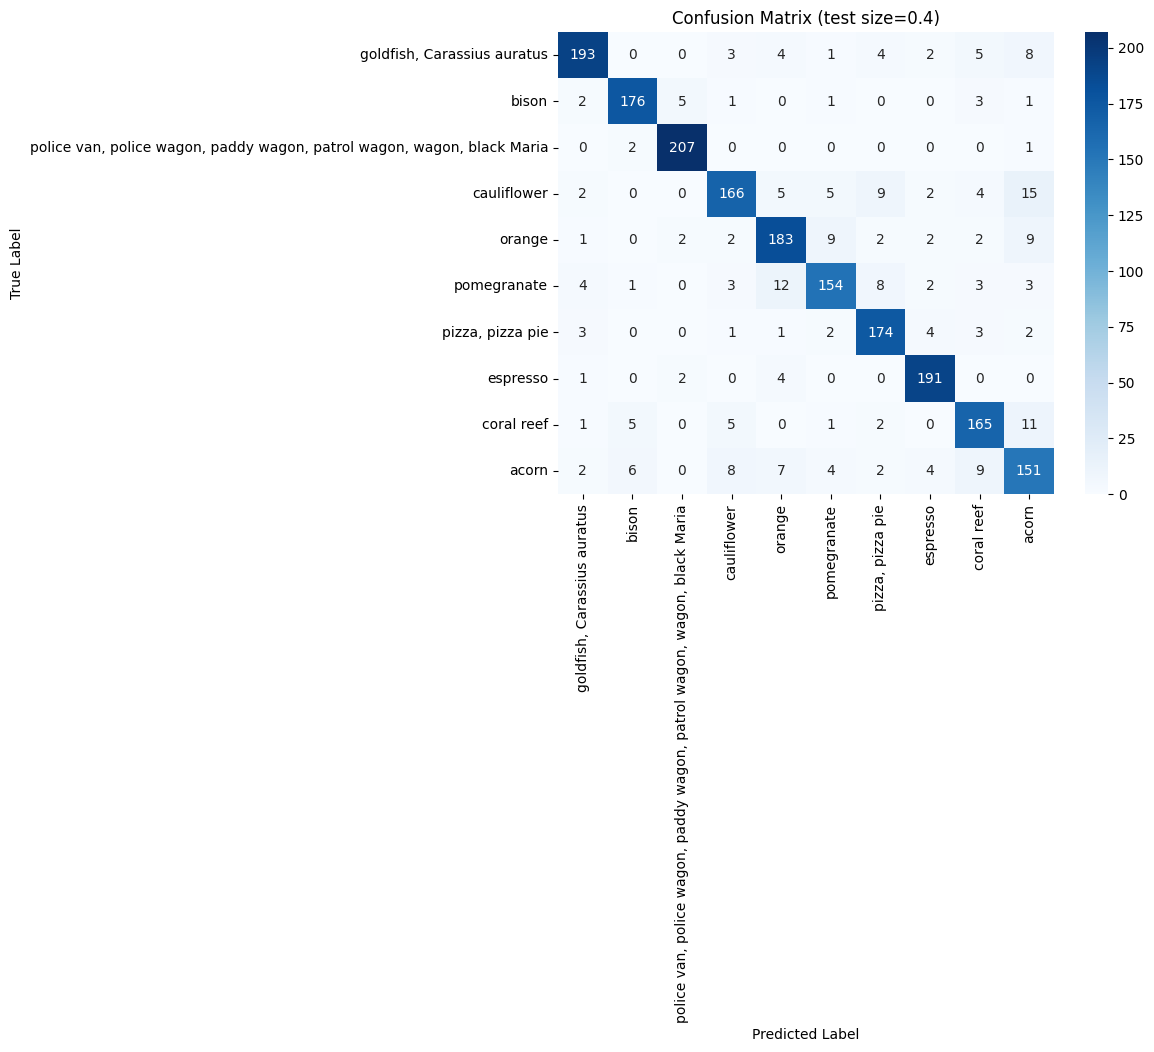


 -+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-


In [ ]:
size = [0.1, 0.2, 0.3, 0.4]


for s in size:

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=s, random_state=42)

    # Find the real names of the corresponded IDs
    words_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ProjectML/data/words.txt', sep='\t', header=None, names=['id', 'label'])
    id_to_name = dict(zip(words_df['id'], words_df['label']))
    labels = sorted(np.unique(np.concatenate([y_train, y_test])))
    labels = [id_to_name[label_id] for label_id in labels]

    # Train the Model
    logistic_regressor = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial')
    logistic_regressor.fit(X_train, y_train)

    # Make Predictions
    y_pred = logistic_regressor.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for test size={s}: {accuracy * 100:.3f}%")

    # Classification Report
    report = classification_report(y_test, y_pred)
    print(report)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix (test size={s})")
    plt.show()

    print("\n -+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-")